In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from matplotlib.markers import MarkerStyle
from matplotlib.colors import Normalize

/tmp/ipykernel_155296/1205417597.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Experiment Setup

```
Query 1
ITR: 2 50 100 150 200 250 300 350 400 450 500 550 600 650 700 750 800 850 900 950 1000
DVFS: 0c00 0d00 0e00 0f00 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 1a00 
RATE: 100000 200000 300000 400000
NSOURCES: 16
NMAPPERS: 16
NSINKS: 16
```

In [17]:
df_comb = pd.read_csv("mapper16/combined.csv")
#df_comb = df_comb[(df_comb['SourcenumRecordsOutPerSecond_avg']/df_comb['rate']) > 0.95]
df_comb["SourcenumRecordsOutPerSecond_percent"] = 1.0-(df_comb['SourcenumRecordsOutPerSecond_avg']/df_comb['rate'])
df_comb["SourcenumRecordsOutPerSecond_percent"] = df_comb["SourcenumRecordsOutPerSecond_percent"].apply(lambda x: 0.0 if x <= 0.0 else x)
def graph(rate, dfo, dfu, left=-0.1, right=1.1, metric='SourcenumRecordsOutPerSecond_percent'):
    plt.rcParams['figure.figsize'] = 25, 10
    plt.rc('axes', labelsize=30)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=30)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=30)    # fontsize of the tick labels

    fig, ax = plt.subplots()

    scatter_c1 = ax.scatter(dfu[metric].tolist(),
                            dfu['pkg_watts_avg'].tolist(), s=500, c=dfu.itr, edgecolor="black", 
                            cmap='Blues', marker=MarkerStyle("o", fillstyle="right"), label="userspace")

    scatter_c2 = ax.scatter(dfu[metric].tolist(),
                            dfu['pkg_watts_avg'].tolist(), s=500, c=dfu.dvfs, edgecolor="black", 
                            cmap='Reds', marker=MarkerStyle("o", fillstyle="left"))

    ax.scatter(dfo[metric].tolist(),
                            dfo['pkg_watts_avg'].tolist(), s=500,edgecolor="black", c='lime',
                           marker=MarkerStyle("o"), label="ondemand")

    # Add colorbars
    cbar_c1 = plt.colorbar(scatter_c1, ax=ax, orientation='vertical', label="ITR-delay (us)")
    cbar_c2 = plt.colorbar(scatter_c2, ax=ax, orientation='vertical', label="DVFS (Ghz)")

    ax.set_xlabel(metric)
    ax.set_ylabel('Power (W)')
    ax.set_xlim(left=left, right=right)
    #ax.set_ylim(bottom=35, top=110.0)

    ax.set_title(f"Query1: {dfu['nmappers'].iloc[0]} Mappers @ {rate}K RPS", size=22)
    plt.legend(fontsize=22)

    plt.tight_layout()

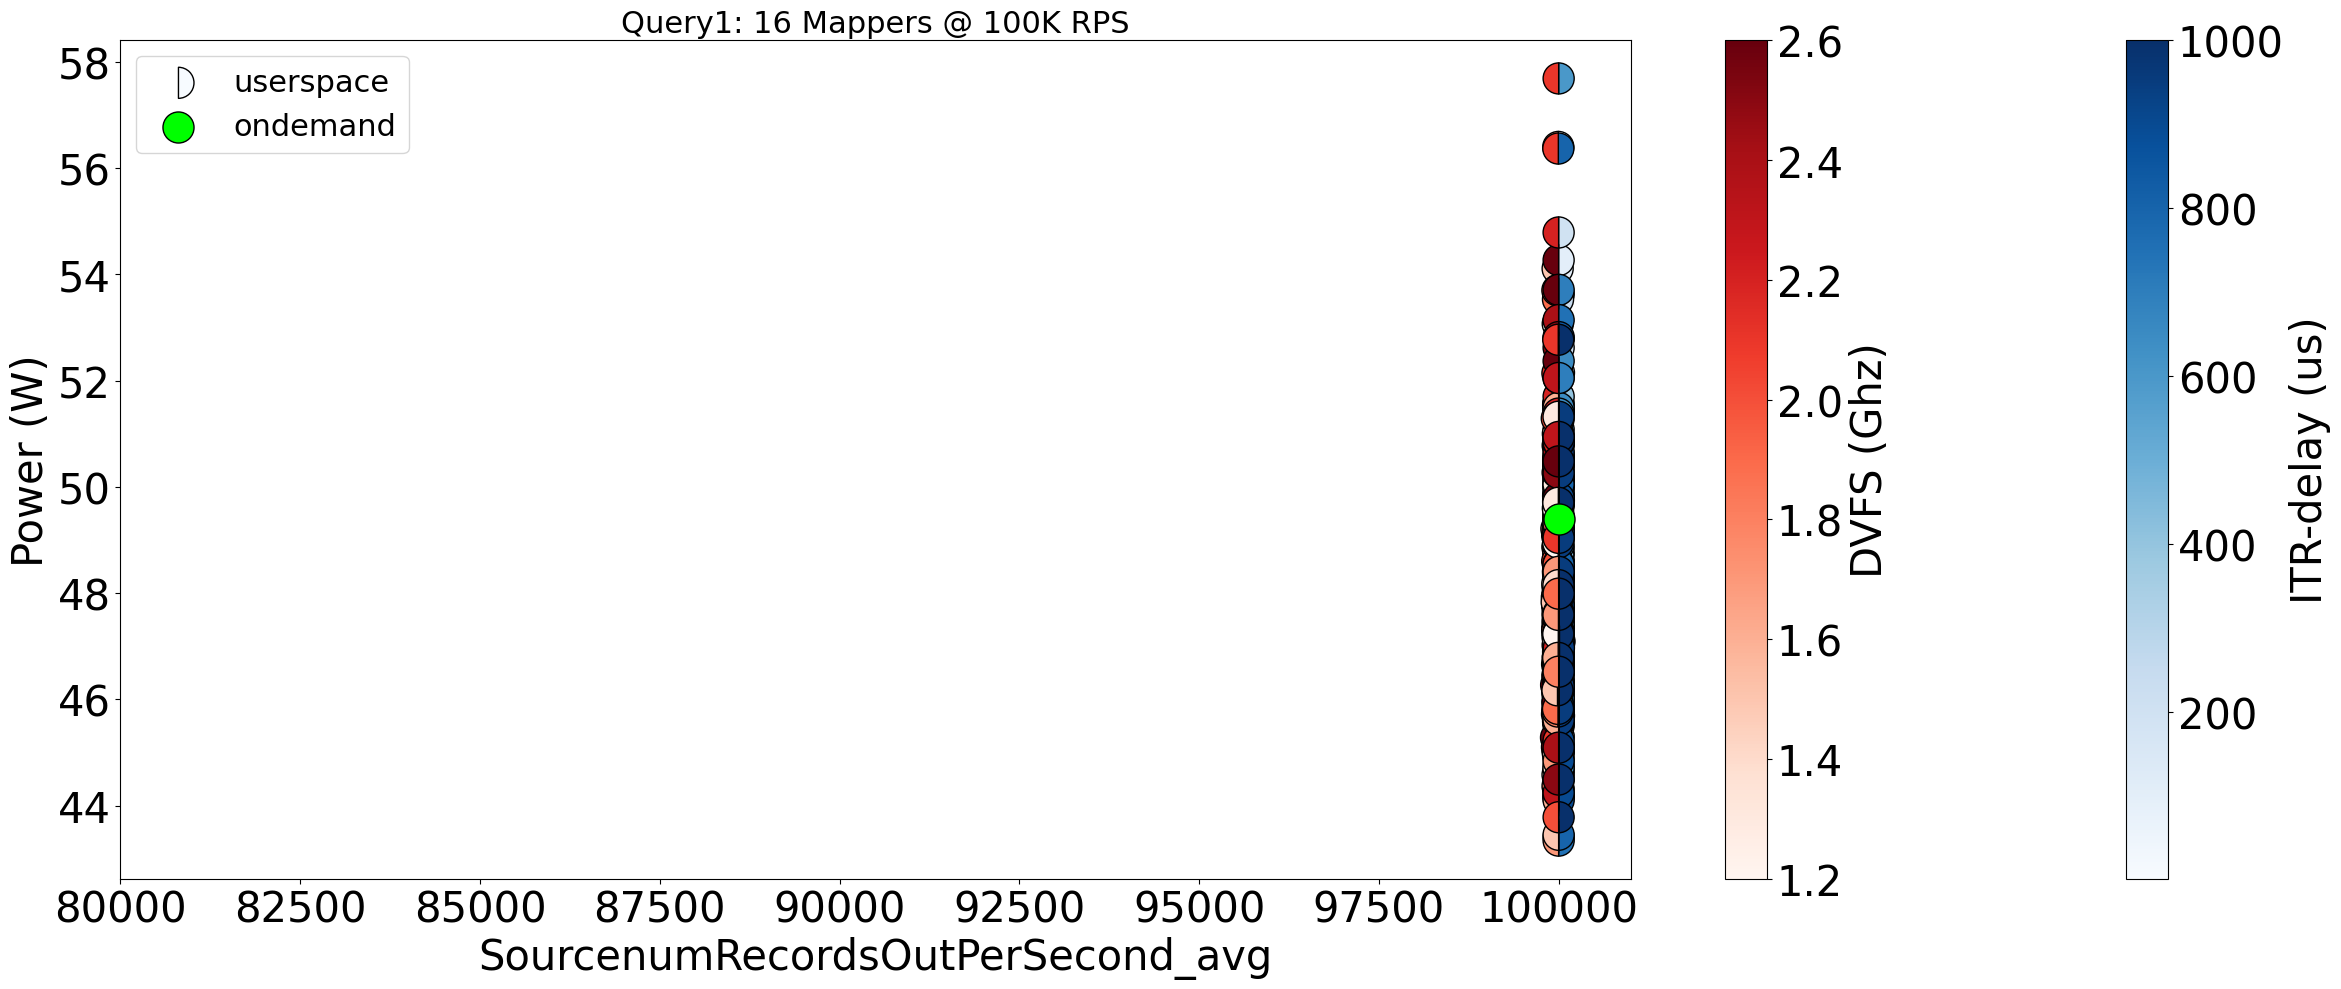

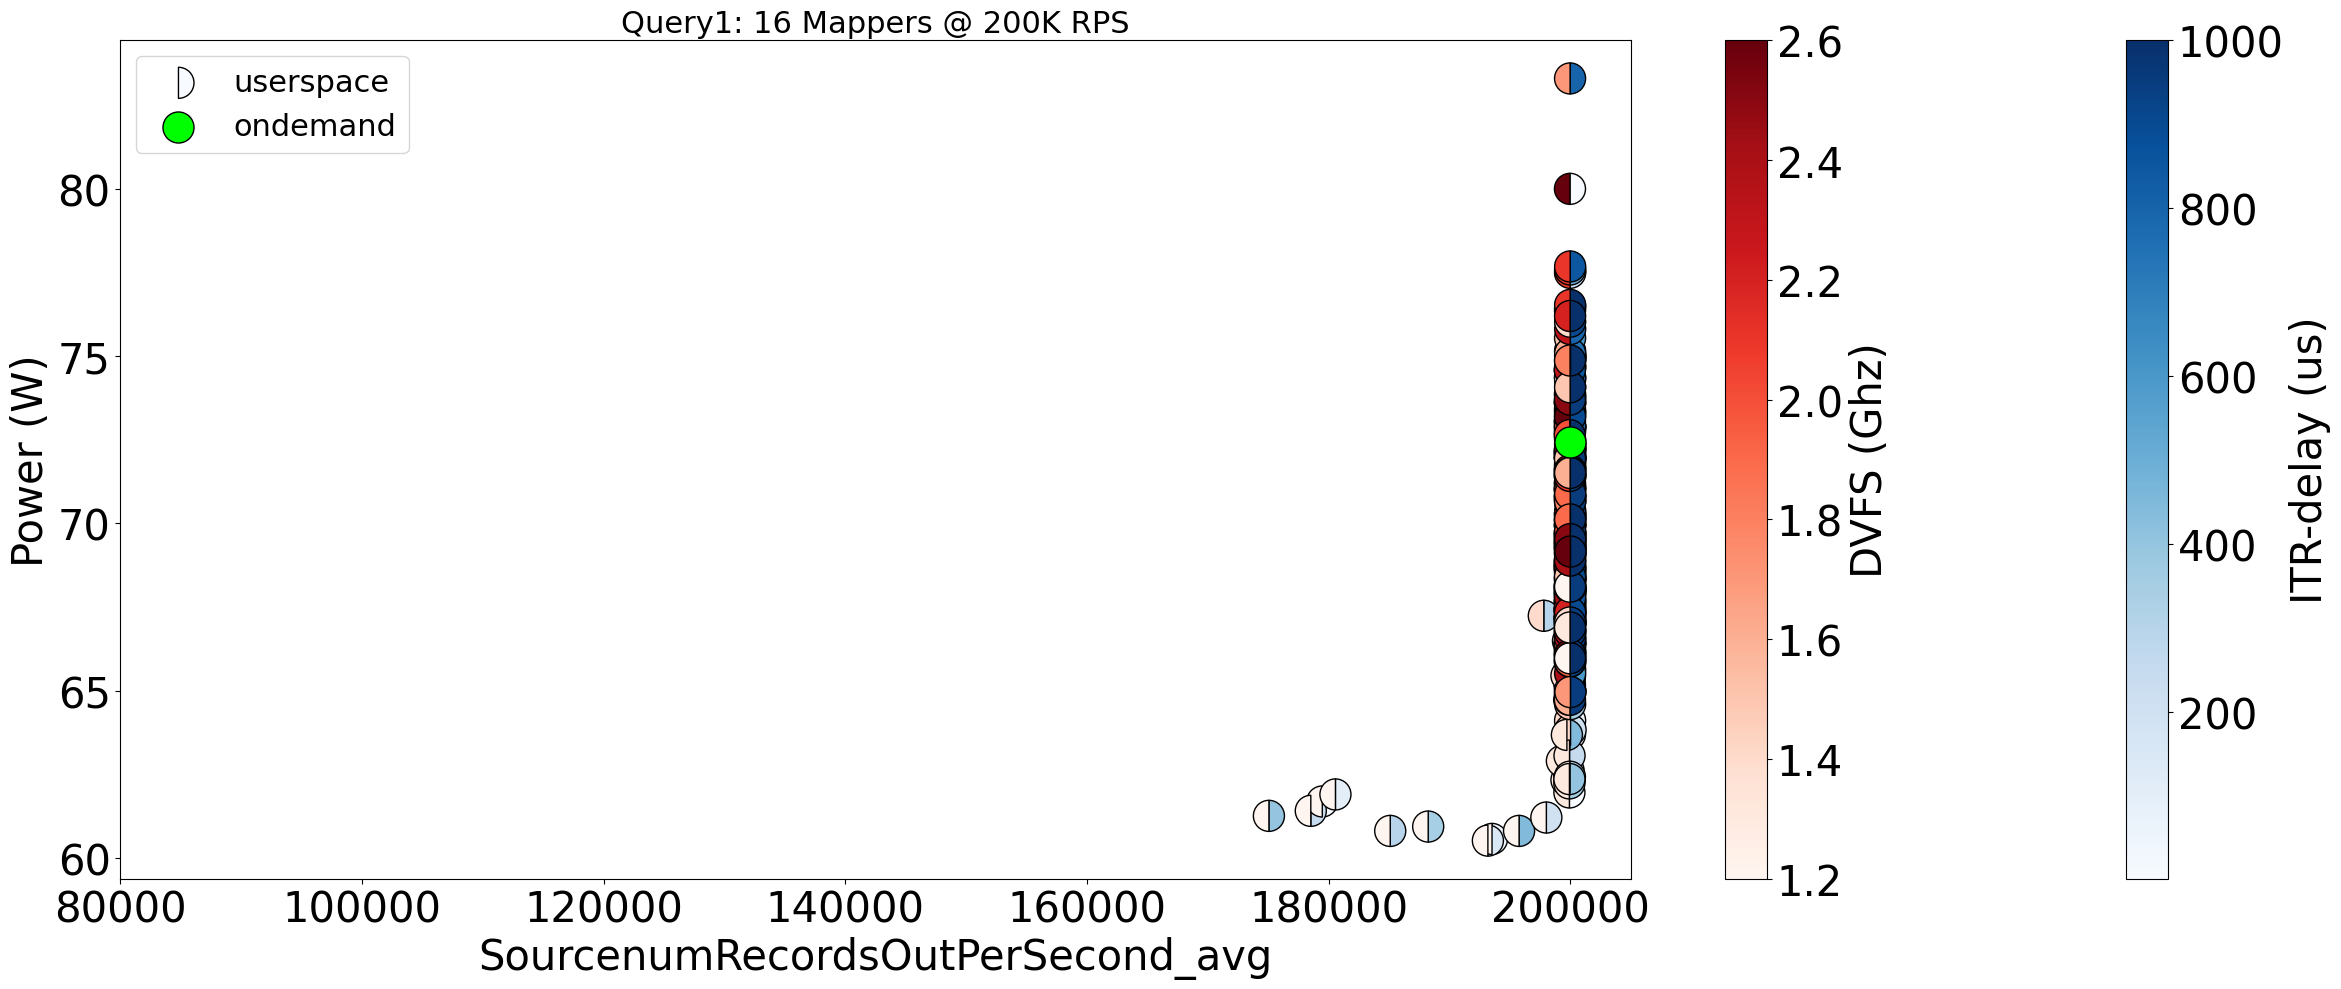

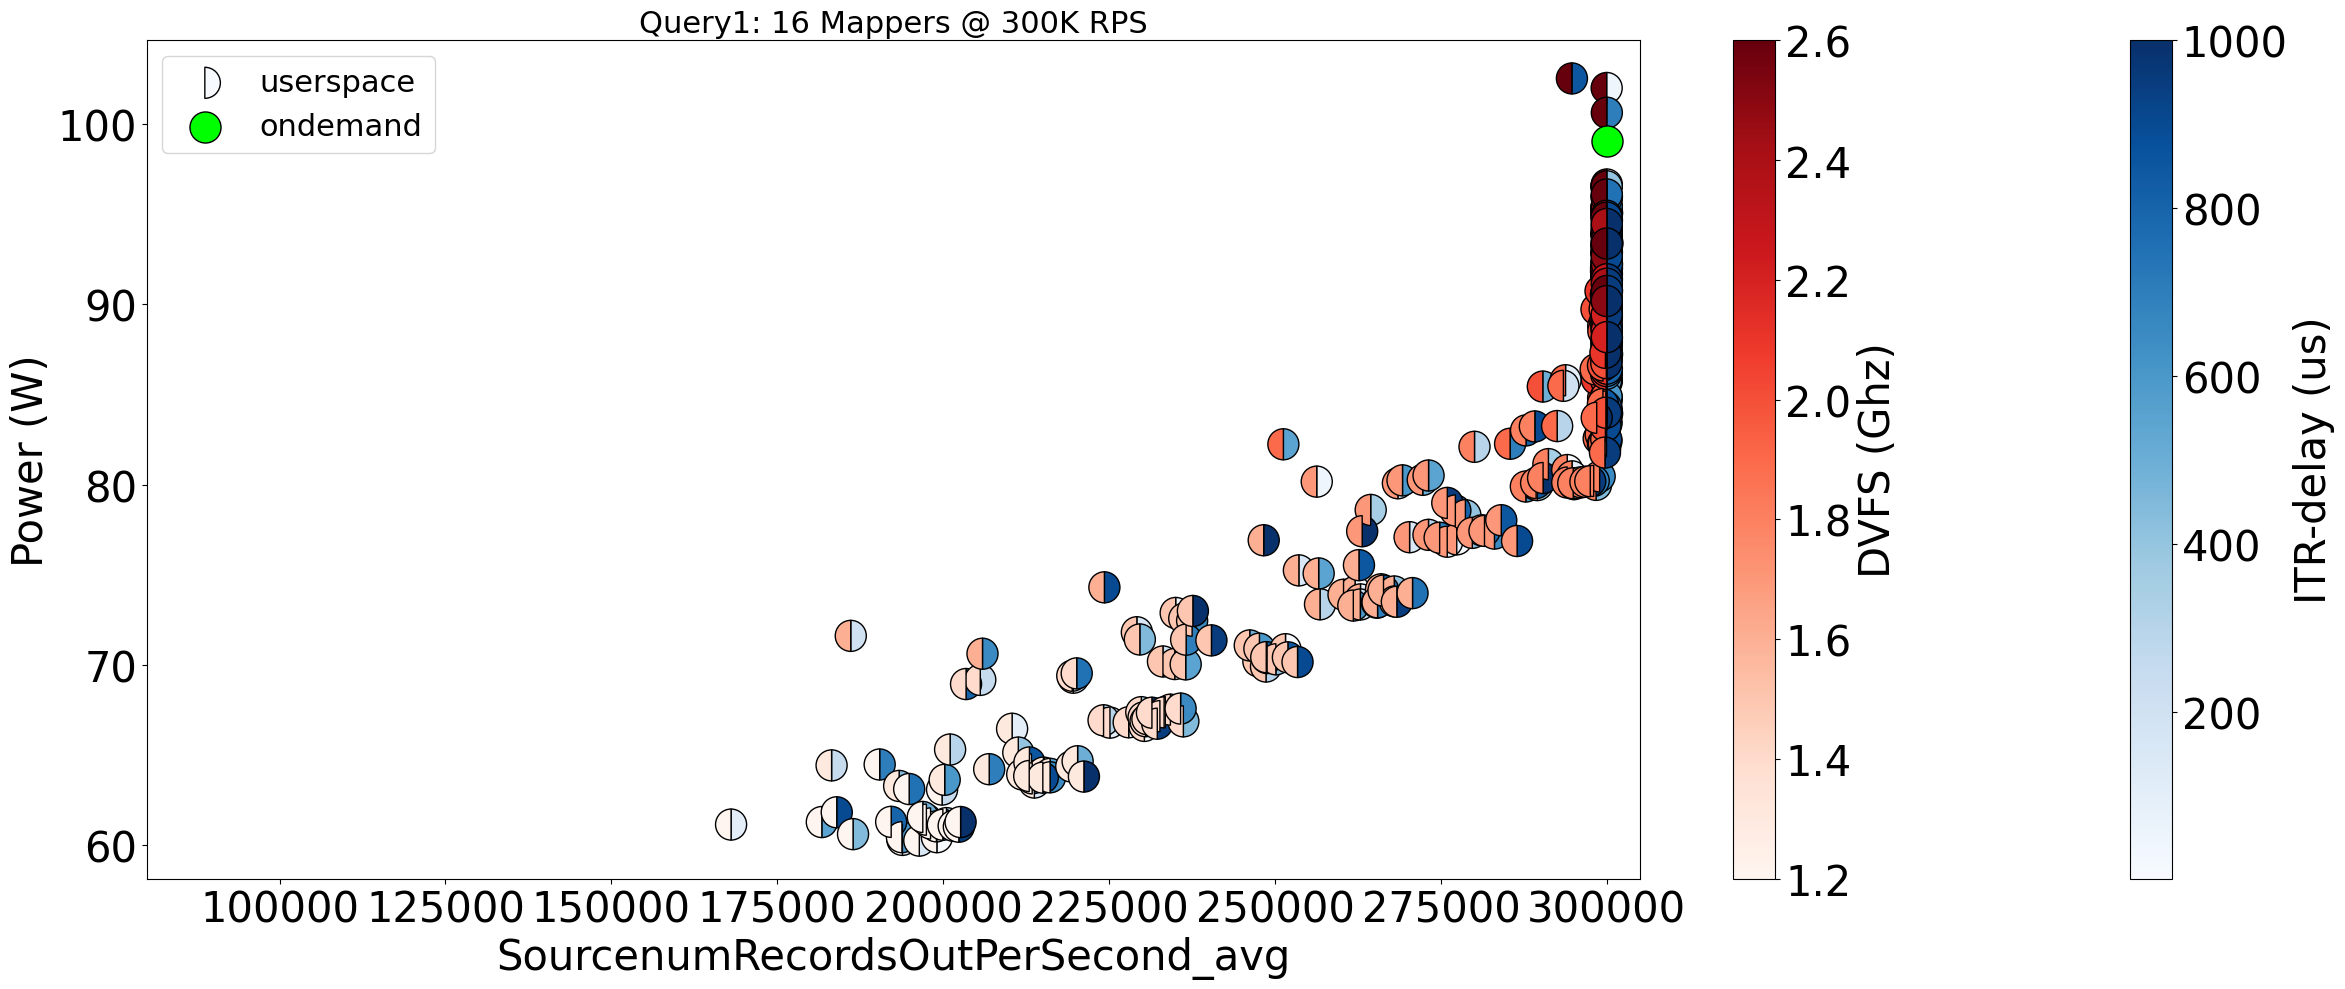

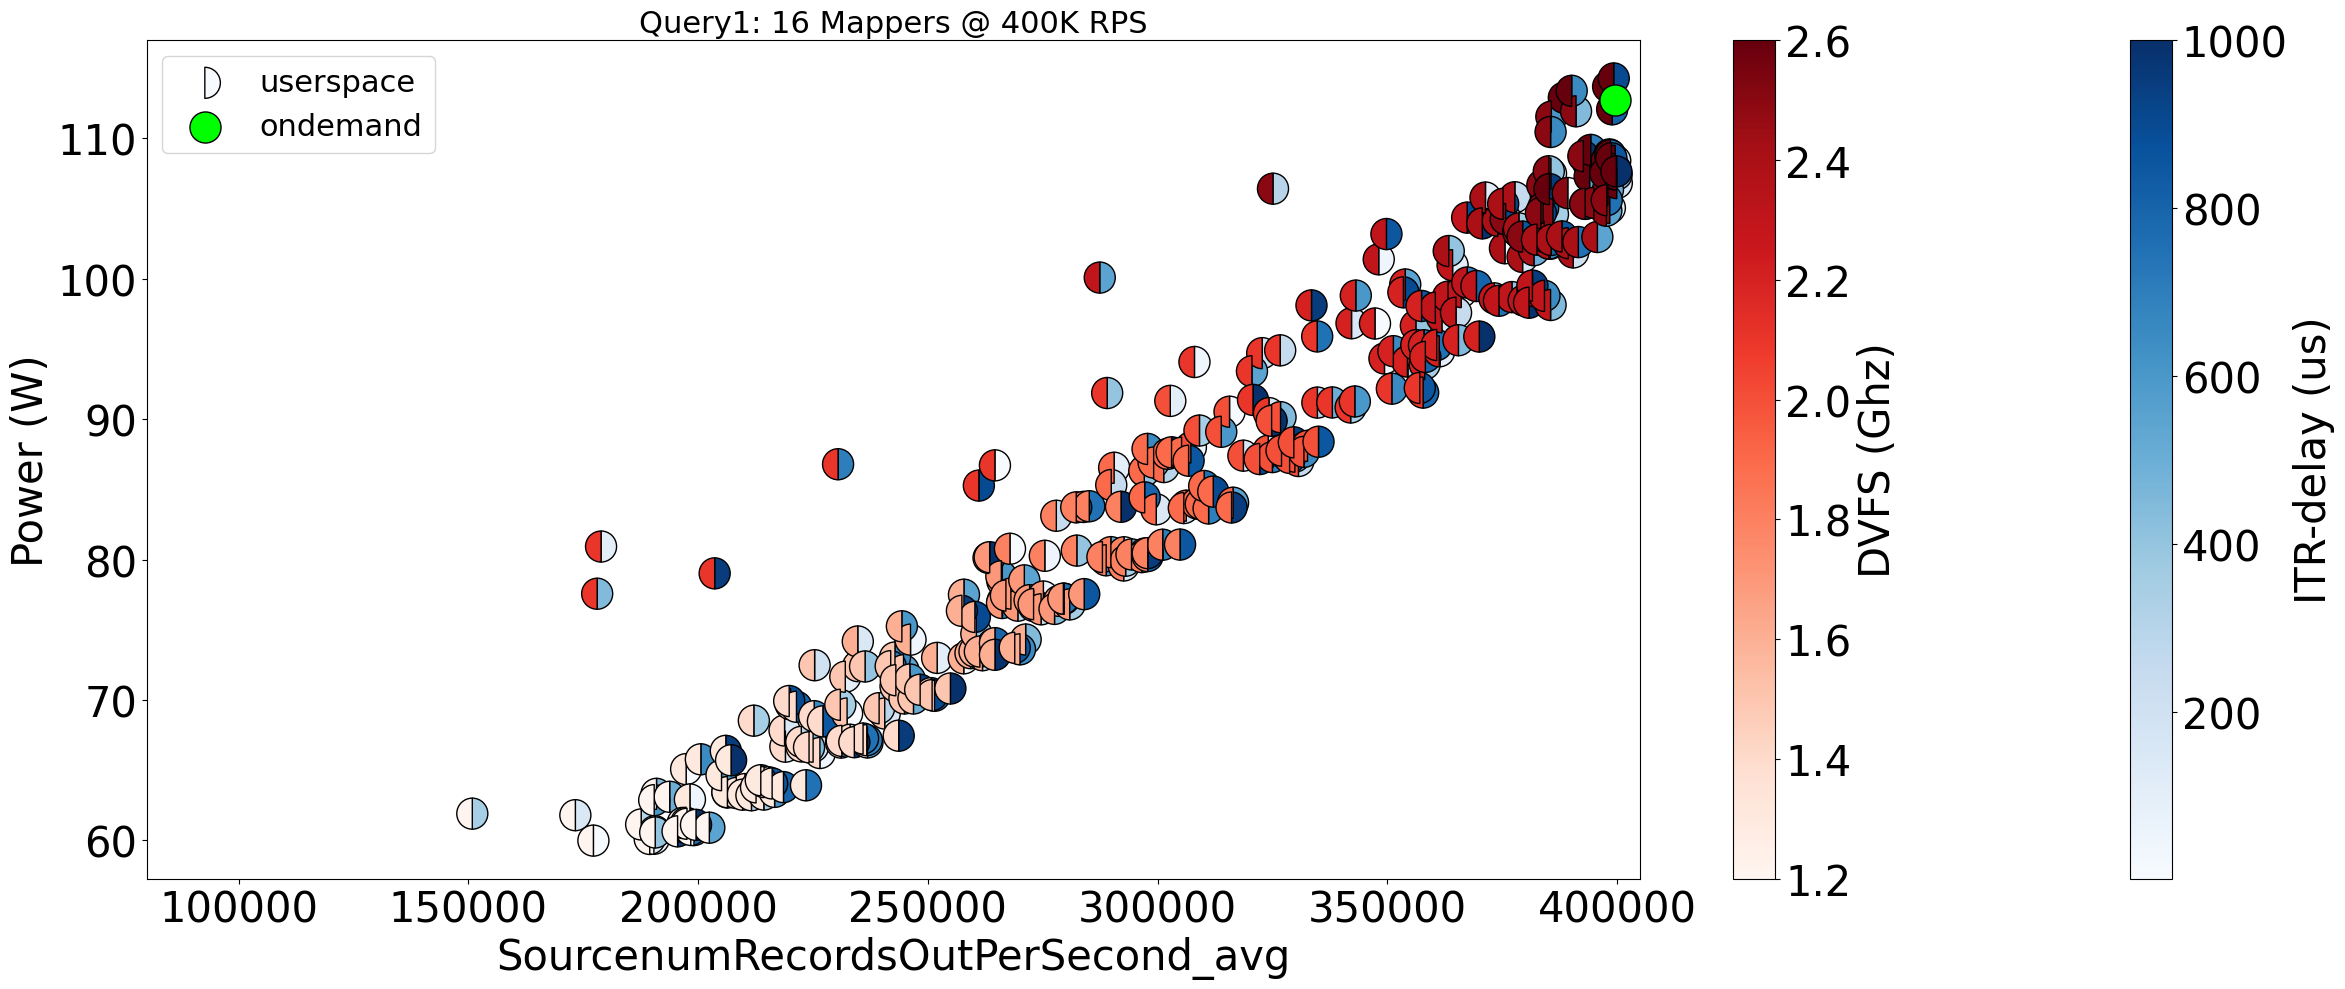

In [24]:
df100o = df_comb[(df_comb.rate == 100000) & (df_comb.policy == 'ondemand')]
df100u = df_comb[(df_comb.rate == 100000) & (df_comb.policy == 'userspace')]
graph(100, df100o, df100u, 80000, 101000, metric='SourcenumRecordsOutPerSecond_avg')

df200o = df_comb[(df_comb.rate == 200000) & (df_comb.policy == 'ondemand')]
df200u = df_comb[(df_comb.rate == 200000) & (df_comb.policy == 'userspace')]
graph(200, df200o, df200u, 80000, 205000,metric='SourcenumRecordsOutPerSecond_avg')

df300o = df_comb[(df_comb.rate == 300000) & (df_comb.policy == 'ondemand')]
df300u = df_comb[(df_comb.rate == 300000) & (df_comb.policy == 'userspace')]
graph(300, df300o, df300u, 80000, 305000,metric='SourcenumRecordsOutPerSecond_avg')  

df400o = df_comb[(df_comb.rate == 400000) & (df_comb.policy == 'ondemand')]
df400u = df_comb[(df_comb.rate == 400000) & (df_comb.policy == 'userspace')]
graph(400, df400o, df400u, 80000, 405000,metric='SourcenumRecordsOutPerSecond_avg') 

In [25]:
df_comb = pd.read_csv("mapper8/combined.csv")
df_comb["SourcenumRecordsOutPerSecond_percent"] = 1.0-(df_comb['SourcenumRecordsOutPerSecond_avg']/df_comb['rate'])
df_comb["SourcenumRecordsOutPerSecond_percent"] = df_comb["SourcenumRecordsOutPerSecond_percent"].apply(lambda x: 0.0 if x <= 0.0 else x)

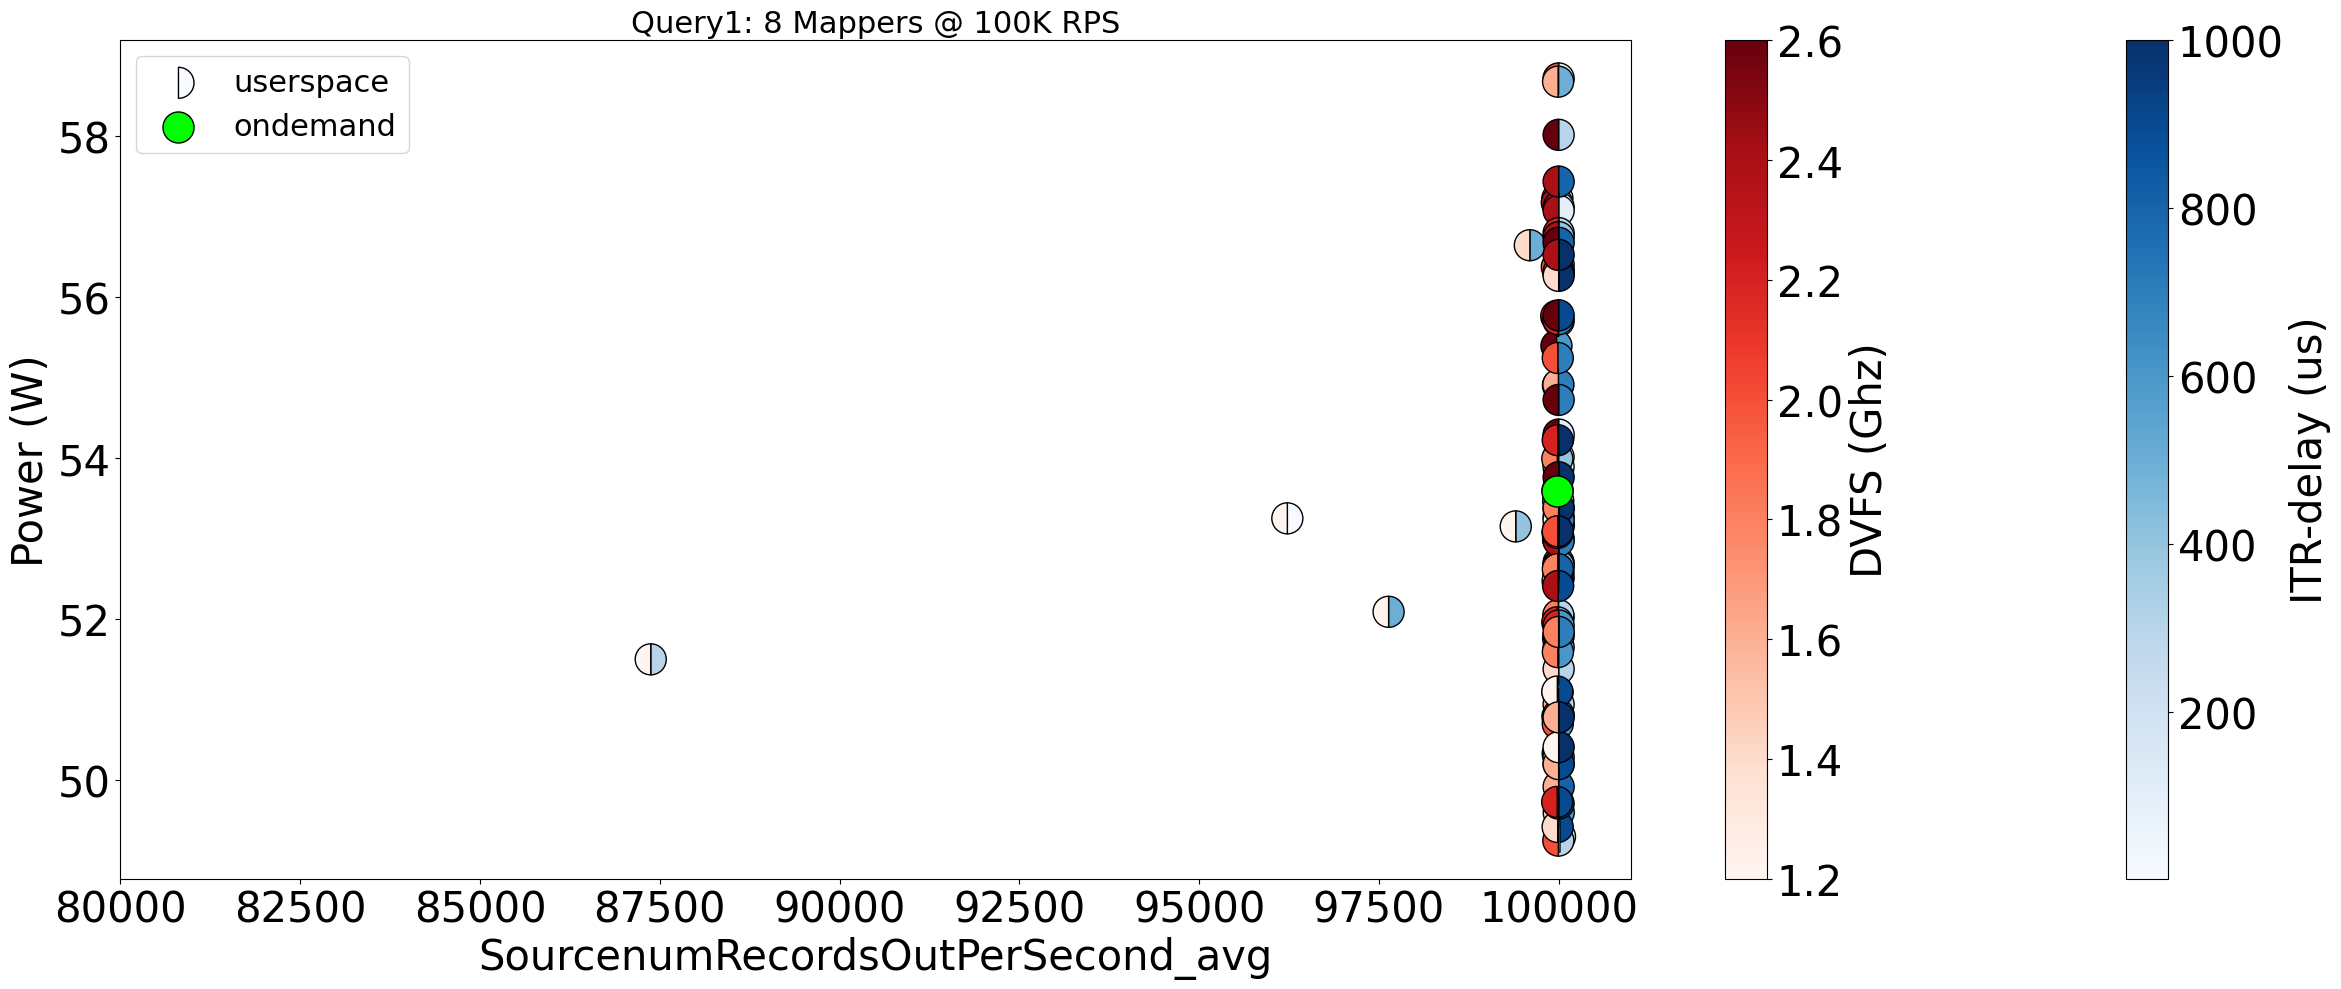

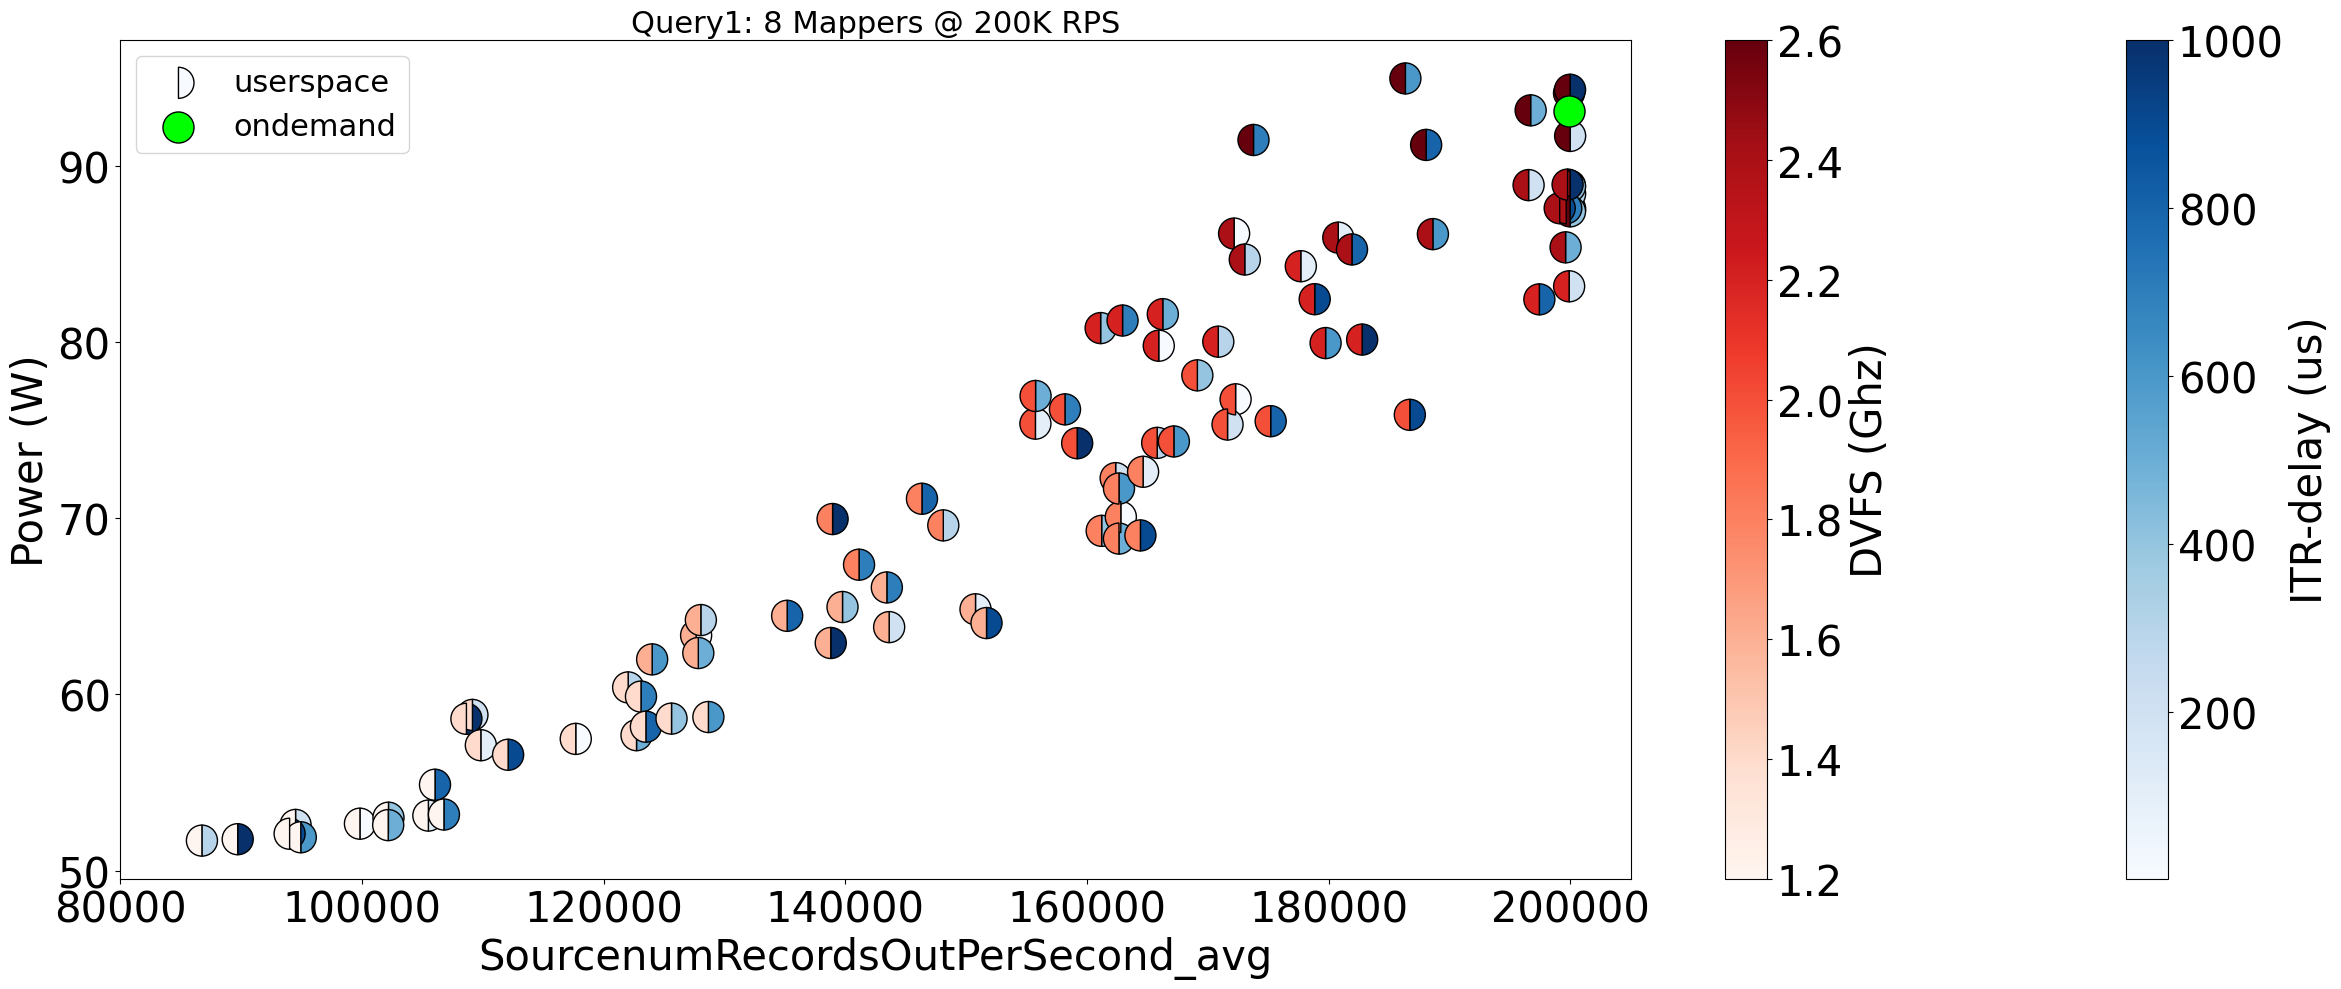

In [27]:
df100o = df_comb[(df_comb.rate == 100000) & (df_comb.policy == 'ondemand')]
df100u = df_comb[(df_comb.rate == 100000) & (df_comb.policy == 'userspace')]
graph(100, df100o, df100u, 80000, 101000, metric='SourcenumRecordsOutPerSecond_avg')

df200o = df_comb[(df_comb.rate == 200000) & (df_comb.policy == 'ondemand')]
df200u = df_comb[(df_comb.rate == 200000) & (df_comb.policy == 'userspace')]
graph(200, df200o, df200u, 80000, 205000,metric='SourcenumRecordsOutPerSecond_avg')

#df300o = df_comb[(df_comb.rate == 300000) & (df_comb.policy == 'ondemand')]
#df300u = df_comb[(df_comb.rate == 300000) & (df_comb.policy == 'userspace')]
#graph(300, df300o, df300u, 80000, 305000,metric='SourcenumRecordsOutPerSecond_avg')  